# VGG19
- 가중치 초기화
- 데이터셋으로 직접 학습
- 입력 데이터 사이즈 (224,224,3)
- optimizer = Adam(0.0001)
- train 데이터 배치사이즈 100
- 과적합 방지를 위해 earlystopping 적용
- 향상된 모델 저장 적용
- steps_per_epoch = 100
- epochs = 50

In [ ]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint
from PIL import Image
from glob import glob
from google.colab import drive
from keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
import random
import cv2
import matplotlib.gridspec as gridspec
from tensorflow.keras.models import load_model

# https://www.kaggle.com/code/senolcomert/fruits-360-transfer-learning-vgg16/notebook

In [ ]:
valid_path = '/content/drive/MyDrive/안봐도보이조_project/valid_10'
train_path = '/content/drive/MyDrive/안봐도보이조_project/train_10'
test_path = '/content/drive/MyDrive/안봐도보이조_project/test_10'

In [ ]:
# test_path = '/content/drive/MyDrive/안봐도보이조_project/resize_valid_(256,256)'
# train_path = '/content/drive/MyDrive/안봐도보이조_project/resize_train_(256,256)'

In [ ]:
# test_path = '/content/drive/MyDrive/안봐도보이조_project/test_10'
# train_path = '/content/drive/MyDrive/안봐도보이조_project/train_10'

In [ ]:
labels=pd.Series(os.listdir(train_path))

labels=labels.sort_values()
labels=labels.to_list()
labels

['10013',
 '10014',
 '10015',
 '10016',
 '10017',
 '10018',
 '10019',
 '10020',
 '10032',
 '10033',
 '10034',
 '10035',
 '10036',
 '10051',
 '10052',
 '10055',
 '10056',
 '10137',
 '20004',
 '20011',
 '20012',
 '20014',
 '20015',
 '20016',
 '20045',
 '20139',
 '20140',
 '25328',
 '25329',
 '25330',
 '25331',
 '25332',
 '25333',
 '25334',
 '25335',
 '25336',
 '25337',
 '25339',
 '25441',
 '25442',
 '30010',
 '30014',
 '30015',
 '30017',
 '30019',
 '30020',
 '30021',
 '30022',
 '30023',
 '30024',
 '30026',
 '30033',
 '30034',
 '30035',
 '30037',
 '30038',
 '30043',
 '30044',
 '30045',
 '35628',
 '35843',
 '35844',
 '40001',
 '40002',
 '40003',
 '40004',
 '40005',
 '40006',
 '40007',
 '40008',
 '40009',
 '40010',
 '40011',
 '40013',
 '40014',
 '40015',
 '40016',
 '40023',
 '40027',
 '40028',
 '40029',
 '40030',
 '40031',
 '40032',
 '40033',
 '40034',
 '40035',
 '40036',
 '40037',
 '40043',
 '40044',
 '40045',
 '40046',
 '40047',
 '40048',
 '40049',
 '40065',
 '40068',
 '45401',
 '45402',


In [ ]:
numberOfClass = len(glob(train_path + "/*"))
numberOfClass

10

In [ ]:
#num of train images
len(glob(train_path + "/*/*"))

10529

#modeling


In [ ]:
# loading model
model = VGG19(weights=None, classes=10)

In [ ]:
print(model.summary())

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# 모델 컴파일
model.compile(optimizer = Adam(0.0001), # 최적화함수 adam사용
              loss = 'categorical_crossentropy', # 손실함수 범주형 교차엔트로피 사용
              metrics = ['accuracy'])

In [ ]:
# 데이터셋 준비
train_datagen = ImageDataGenerator(rescale=1./255,         # 픽셀 값을 0~1 범위로 변환(scaling)
                                   rotation_range=40,      # 40도까지 회전
                                   width_shift_range=0.2,  # 20%까지 좌우 이동
                                   height_shift_range=0.2, # 20%까지 상하 이동
                                   shear_range=0.2,        # 20%까지 기울임
                                   zoom_range=0.2,         # 20%까지 확대/축소
                                   vertical_flip=True)   # 위아래 뒤집기
    
train_data = train_datagen.flow_from_directory(train_path, # 데이터가 존재하는 디렉토리
                                                    batch_size=100, # 배치사이즈(변경가능)
                                                    class_mode='categorical', # 다중 분류이므로 categorical
                                                    target_size=(224,224)) # 모델에 입력해줄 데이터 사이즈(변경가능)

valid_datagen = ImageDataGenerator(rescale=1./255) # 스케일링만 진행
valid_data = valid_datagen.flow_from_directory(valid_path,
                                              batch_size=20,      
                                              class_mode='categorical', 
                                              target_size=(224, 224))

test_datagen = ImageDataGenerator(rescale=1./255) # 스케일링만 진행
test_data = test_datagen.flow_from_directory(test_path,
                                                  batch_size=10,      
                                                  class_mode='categorical', 
                                                  target_size=(224, 224),shuffle=False) #test data 에선  shuffle false 로 해야


Found 10529 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [ ]:
#모델 최적화 설정
MODEL_DIR = '/content/drive/MyDrive/model_sek/' #model dir 만들기
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = '/content/drive/MyDrive/model_sek/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
 #valloss 기준으로 좋아지는 모델 저장
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)
 #val loss 기준으로 더이상 안좋아지면 5까지 해보고 그만 두기

In [ ]:
# training model
# batch_size = 50
hist = model.fit(train_data,
                          steps_per_epoch = 100,
                          epochs = 100,
                          validation_data = valid_data,
                          validation_steps =30,
                          callbacks = [early_stopping_callback, checkpointer])

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 1.9587 - accuracy: 0.2153 
Epoch 1: val_loss improved from inf to 1.42107, saving model to /content/drive/MyDrive/model_sek/01-1.4211.hdf5
100/100 [==============================] - 5596s 56s/step - loss: 1.9587 - accuracy: 0.2153 - val_loss: 1.4211 - val_accuracy: 0.4167
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 1.1686 - accuracy: 0.5168
Epoch 2: val_loss improved from 1.42107 to 0.68610, saving model to /content/drive/MyDrive/model_sek/02-0.6861.hdf5
100/100 [==============================] - 486s 5s/step - loss: 1.1686 - accuracy: 0.5168 - val_loss: 0.6861 - val_accuracy: 0.7117
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.5571 - accuracy: 0.7578
Epoch 3: val_loss improved from 0.68610 to 0.34139, saving model to /content/drive/MyDrive/model_sek/03-0.3414.hdf5
100/100 [==============================] - 188s 2s/step - loss: 0.5571 - accuracy: 0.7578 - val_lo

In [ ]:
print('\n test accuracy: %.4f'% (model.evaluate(test_data))[1])

50/50 [==============================] - 254s 5s/step - loss: 0.0109 - accuracy: 0.9980

 test accuracy: 0.9980


In [ ]:
model.evaluate(valid_data)

50/50 [==============================] - 4s 76ms/step - loss: 0.0022 - accuracy: 1.0000


[0.0022323494777083397, 1.0]

In [ ]:
# writing history
import json, codecs

with open("/content/drive/MyDrive/model_sek/model_VGG19transfer_sek_1.1.json","w") as f:
    json.dump(hist.history,f)

In [ ]:
# # reading history
# with codecs.open("model_VGG19transfer_sek_1.json","r",encoding= "utf-8") as f:
    
#     n = json.loads(f.read())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


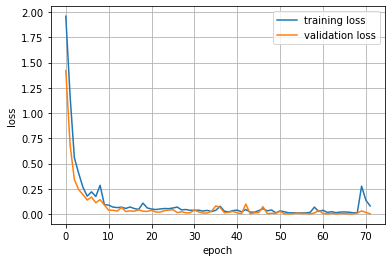

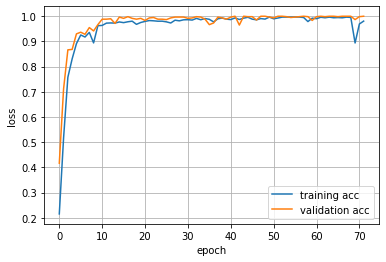

In [ ]:
# visualizing accuracy and loss
print(hist.history.keys())
plt.figure()
plt.plot(hist.history["loss"], label = "training loss")
plt.plot(hist.history["val_loss"], label = "validation loss")
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.figure()
plt.plot(hist.history["accuracy"], label = "training acc")
plt.plot(hist.history["val_accuracy"], label = "validation acc")
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


predict

In [ ]:
# get 25 random images from directory

import random
import cv2

def get25img(directory):
  images = []
  path = glob(directory + "/*/*")
  random_path = random.sample(path, 25)
  for i in random_path:
    image = cv2.imread(i) 
    image = cv2.resize(image,(224,224))         
    images.append(image)
  return images



In [ ]:
path = glob(test_path + "/*/*")
random.sample(path, 25)

['/content/drive/MyDrive/안봐도보이조_project/test_10/트로피카나망고/gen_0_9438.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_10/펩시콜라/gen_0_9860.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_10/코카콜라/gen_0_9297.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_10/스프라이트/gen_0_5776.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_10/밀키스/gen_0_2331.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_10/마운틴듀/gen_0_1675.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_10/코카콜라/10051_38.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_10/코카콜라/gen_0_8537.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_10/환타오렌지/gen_0_7022.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_10/밀키스/gen_0_798.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_10/레쓰비/gen_0_3728.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_10/펩시콜라/gen_0_4106.jpg',
 '/content/dr

In [ ]:
  #predict  
  pred_images = get25img(test_path)
  pred_images = np.array(pred_images)/255.
  prediction = model.predict(pred_images, verbose = 1)




1/1 [==============================] - 0s 158ms/step


In [ ]:
test_data

In [ ]:
#test data index
dic = test_data.class_indices
dic

{'갈아만든배': 0,
 '레쓰비': 1,
 '마운틴듀': 2,
 '밀키스': 3,
 '스프라이트': 4,
 '칠성사이다': 5,
 '코카콜라': 6,
 '트로피카나망고': 7,
 '펩시콜라': 8,
 '환타오렌지': 9}

In [ ]:
dic.keys()

dict_keys(['갈아만든배', '레쓰비', '마운틴듀', '밀키스', '스프라이트', '칠성사이다', '코카콜라', '트로피카나망고', '펩시콜라', '환타오렌지'])

In [ ]:
dic.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# label name 을 찾아 오는 함수를 정의한다.
def findKey(search_value):
    for key, value in dic.items():
        if(value == search_value):
            return key
    return -1

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4362 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4359 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4469 missing from current font.
  font.set_text(s

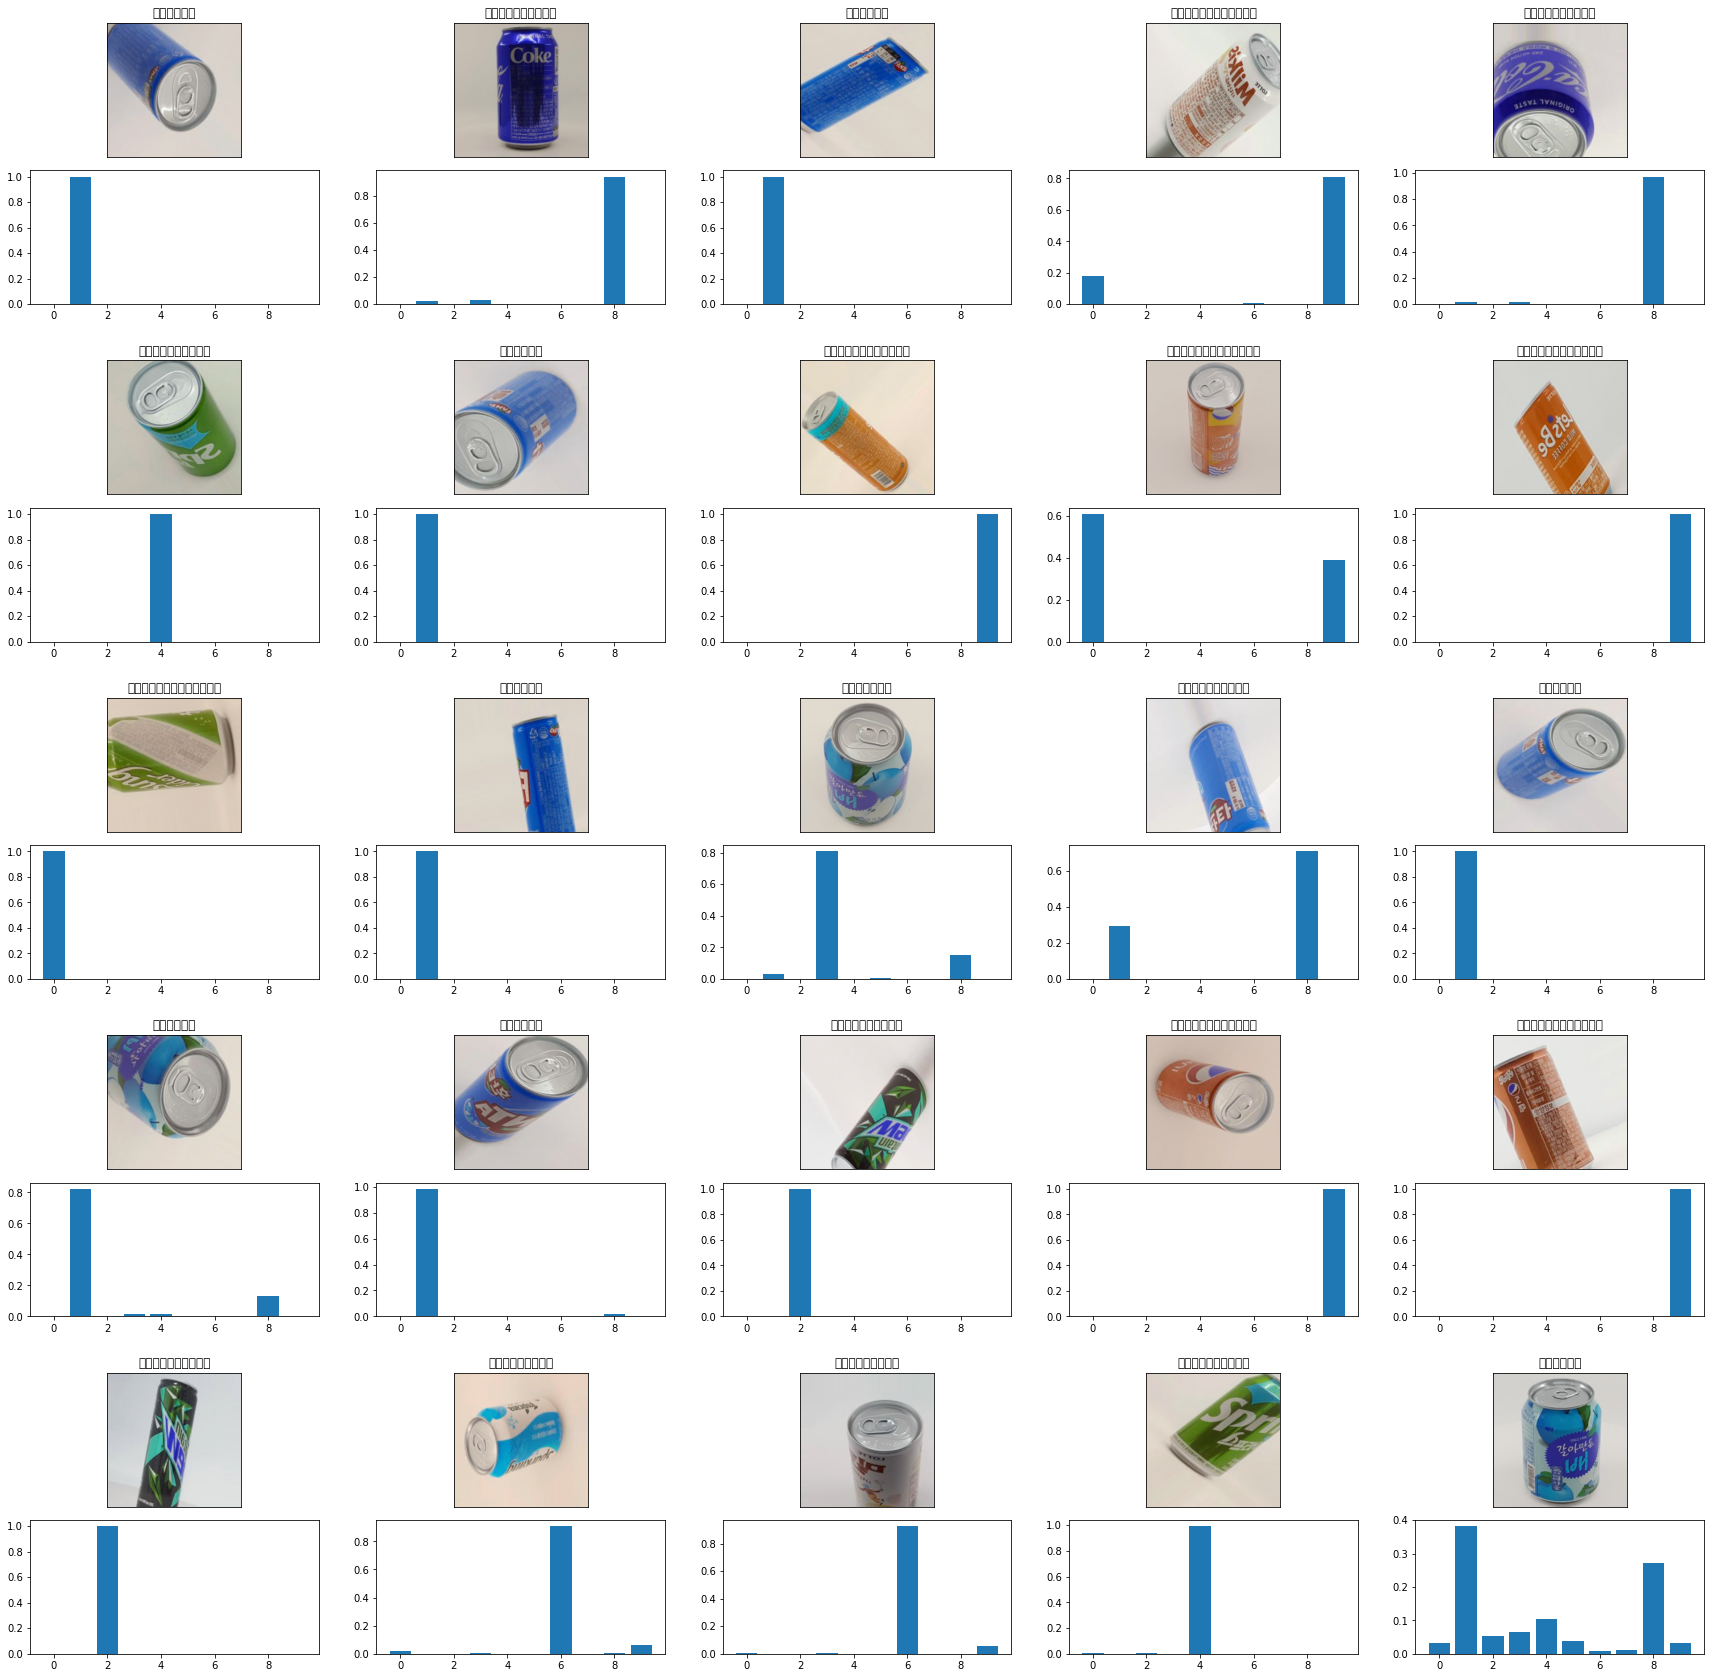

In [ ]:
# 예측한 결과는 아래와 같습니다. 이미지의 위에는 class label을 이미지 아래에는 확률을 나타냅니다.
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    pred_image = np.array([pred_images[i]])
    pred_class = findKey(np.argmax(prediction[i])) 
    pred_prob = prediction[i].reshape(numberOfClass)   # 예측된 결과(확률값)를 1차원 배열(6칸)로 reshape 합니다. 
    for j in range(2):
        if (j%2) == 0:                        # 처음에는 이미지와 title(label name) 을 보여줍니다.
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:                                 # 그다음은 확률값을 그래프 형태로 보여줍니다. 
            ax = plt.Subplot(fig, inner[j])
            ax.bar(range(numberOfClass),pred_prob)
            fig.add_subplot(ax)

fig.show()


#왜 label 이 안보일까...
#https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/demo_constrained_layout.html#sphx-glr-gallery-subplots-axes-and-figures-demo-constrained-layout-py


In [ ]:


def compare_pred(directory, num):
  path = glob(directory + "/*/*")
  random_path = random.sample(path, num)
  out = []
  for i in random_path:
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224))  
    image = np.array(image)*1./255
    image = image.reshape(1, 224,224,3)
    prediction =model.predict(image)
    max = np.argmax(prediction)
    akey = i.split('/')[-2]
    pkey = findKey(max) 
    path = i
    out.append([ path, max, akey, pkey])
  out = pd.DataFrame(out, columns = ['path', 'predict', 'a_name', 'p_name'])
  out['compare'] = np.where(out.a_name == out.p_name, 1, 0)
  return out


In [ ]:
df = compare_pred(test_path, 150)
df


,path,predict,a_name,p_name,compare
0,/content/drive/MyDrive/안봐도보이조_project/t...,0,갈아만든배,갈아만든배,1
1,/content/drive/MyDrive/안봐도보이조_project/t...,1,레쓰비,레쓰비,1
2,/content/drive/MyDrive/안봐도보이조_project/t...,6,코카콜라,코카콜라,1
3,/content/drive/MyDrive/안봐도보이조_project/t...,6,코카콜라,코카콜라,1
4,/content/drive/MyDrive/안봐도보이조_project/t...,7,트로피카나망고,트로피카나망고,1
...,...,...,...,...,...
145,/content/drive/MyDrive/안봐도보이조_project/t...,7,트로피카나망고,트로피카나망고,1
146,/content/drive/MyDrive/안봐도보이조_project/t...,7,트로피카나망고,트로피카나망고,1
147,/content/drive/MyDrive/안봐도보이조_project/t...,1,레쓰비,레쓰비,1
148,/content/drive/MyDrive/안봐도보이조_project/t...,0,갈아만든배,갈아만든배,1


In [ ]:
df['compare'].sum()/len(df)

1.0

In [ ]:
df_valid = compare_pred(valid_path, 100)

In [ ]:
df_valid

,path,predict,a_name,p_name,compare
0,/content/drive/MyDrive/안봐도보이조_project/v...,1,환타오렌지,레쓰비,0
1,/content/drive/MyDrive/안봐도보이조_project/v...,0,밀키스,갈아만든배,0
2,/content/drive/MyDrive/안봐도보이조_project/v...,0,트로피카나망고,갈아만든배,0
3,/content/drive/MyDrive/안봐도보이조_project/v...,1,갈아만든배,레쓰비,0
4,/content/drive/MyDrive/안봐도보이조_project/v...,0,트로피카나망고,갈아만든배,0
...,...,...,...,...,...
95,/content/drive/MyDrive/안봐도보이조_project/v...,0,트로피카나망고,갈아만든배,0
96,/content/drive/MyDrive/안봐도보이조_project/v...,1,트로피카나망고,레쓰비,0
97,/content/drive/MyDrive/안봐도보이조_project/v...,0,트로피카나망고,갈아만든배,0
98,/content/drive/MyDrive/안봐도보이조_project/v...,1,환타오렌지,레쓰비,0


In [ ]:
df_valid['compare'].sum()/len(df_valid)

0.19

In [ ]:
model = load_model('/content/drive/MyDrive/model_sek/VGG19_sek5_62-0.0012_BEST.hdf5')

In [ ]:
# label name 을 찾아 오는 함수를 정의한다.
def findKey(search_value):
    for key, value in dic.items():
        if(value == search_value):
            return key
    return -1

In [ ]:
def compare_pred_real(directory, label_list):
  path = glob(directory + "/*")
  out = []
  for i in path:
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224))  
    image = np.array(image)*1./255
    image = image.reshape(1, 224,224,3)
    prediction =model.predict(image)
    max = np.argmax(prediction)
    pkey = findKey(max) 
    path = i
    out.append([ path, max,pkey])
  out = pd.DataFrame(out, columns = ['path', 'predict', 'p_name'])
  out['label'] = pd.DataFrame(label_list)
  out['l_name'] = pd.DataFrame(list(map(lambda x: findKey(x), label_list)))
  out['compare'] = np.where(out.label == out.predict, 1, 0)
  out.sort_values(by = ['compare'], inplace = True)
  return out


In [ ]:
realpath = '/content/drive/MyDrive/안봐도보이조_project/test_real'

In [ ]:
label_list = [1,1,8,4,3,3,9,4,8,6,6,9]
'''
]

{'갈아만든배': 0,
 '레쓰비': 1,
 '마운틴듀': 2,
 '밀키스': 3,
 '스프라이트': 4,
 '칠성사이다': 5,
 '코카콜라': 6,
 '트로피카나망고': 7,
 '펩시콜라': 8,
 '환타오렌지': 9}'''

"\n]\n\n{'갈아만든배': 0,\n '레쓰비': 1,\n '마운틴듀': 2,\n '밀키스': 3,\n '스프라이트': 4,\n '칠성사이다': 5,\n '코카콜라': 6,\n '트로피카나망고': 7,\n '펩시콜라': 8,\n '환타오렌지': 9}"

In [ ]:
df_real = compare_pred_real(realpath, label_list)

In [ ]:
df_real

,path,predict,p_name,label,l_name,compare
2,/content/drive/MyDrive/안봐도보이조_project/t...,1,레쓰비,8,펩시콜라,0
3,/content/drive/MyDrive/안봐도보이조_project/t...,0,갈아만든배,4,스프라이트,0
4,/content/drive/MyDrive/안봐도보이조_project/t...,0,갈아만든배,3,밀키스,0
5,/content/drive/MyDrive/안봐도보이조_project/t...,0,갈아만든배,3,밀키스,0
6,/content/drive/MyDrive/안봐도보이조_project/t...,0,갈아만든배,9,환타오렌지,0
7,/content/drive/MyDrive/안봐도보이조_project/t...,0,갈아만든배,4,스프라이트,0
8,/content/drive/MyDrive/안봐도보이조_project/t...,1,레쓰비,8,펩시콜라,0
11,/content/drive/MyDrive/안봐도보이조_project/t...,0,갈아만든배,9,환타오렌지,0
0,/content/drive/MyDrive/안봐도보이조_project/t...,1,레쓰비,1,레쓰비,1
1,/content/drive/MyDrive/안봐도보이조_project/t...,1,레쓰비,1,레쓰비,1


In [ ]:
list111 = [9,9,9,9,8,8,8,8,1,1,1,1,3,3,3,5,5,5,6,6,6]

In [ ]:
df_real111 = compare_pred_real('/content/drive/MyDrive/안봐도보이조_project/111', list111)


In [ ]:
df_real111

,path,predict,p_name,label,l_name,compare
17,/content/drive/MyDrive/안봐도보이조_project/1...,9,환타오렌지,5,칠성사이다,0
16,/content/drive/MyDrive/안봐도보이조_project/1...,9,환타오렌지,5,칠성사이다,0
4,/content/drive/MyDrive/안봐도보이조_project/1...,1,레쓰비,8,펩시콜라,0
5,/content/drive/MyDrive/안봐도보이조_project/1...,1,레쓰비,8,펩시콜라,0
6,/content/drive/MyDrive/안봐도보이조_project/1...,1,레쓰비,8,펩시콜라,0
7,/content/drive/MyDrive/안봐도보이조_project/1...,1,레쓰비,8,펩시콜라,0
15,/content/drive/MyDrive/안봐도보이조_project/1...,9,환타오렌지,5,칠성사이다,0
14,/content/drive/MyDrive/안봐도보이조_project/1...,0,갈아만든배,3,밀키스,0
13,/content/drive/MyDrive/안봐도보이조_project/1...,0,갈아만든배,3,밀키스,0
12,/content/drive/MyDrive/안봐도보이조_project/1...,0,갈아만든배,3,밀키스,0


In [ ]:
def compare_pred_real(directory, label_list):
  path = glob(directory + "/*")
  out = []
  for i in path:
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224))  
    image = np.array(image)*1./255
    image = image.reshape(1, 224,224,3)
    prediction =model.predict(image)
    max = np.argmax(prediction)
    pkey = findKey(max) 
    path = i
    out.append([ path, max,pkey])
  out = pd.DataFrame(out, columns = ['path', 'predict', 'p_name'])
  out['label'] = pd.DataFrame(label_list)
  out['l_name'] = pd.DataFrame(list(map(lambda x: findKey(x), label_list)))
  out['compare'] = np.where(out.label == out.predict, 1, 0)
  out = out.sort_values(by = 'compare')
  return out



In [ ]:
realpath = '/content/drive/MyDrive/안봐도보이조_project/test_real'
glob(realpath + "/*")

['/content/drive/MyDrive/안봐도보이조_project/test_real/WIN_20220323_15_02_23_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_real/WIN_20220323_15_02_56_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_real/WIN_20220323_15_03_27_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_real/WIN_20220323_15_03_41_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_real/WIN_20220323_15_04_30_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_real/WIN_20220323_15_04_44_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_real/WIN_20220323_15_04_54_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_real/WIN_20220323_15_03_38_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_real/WIN_20220323_15_03_06_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_real/WIN_20220323_15_04_05_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/test_real/WIN_20220323_15_04_07_Pro.jpg',
 '/content/drive/MyDr

In [ ]:
label_list = [1,1,8,4,3,3,9,4,8,6,6,9]
'''
]

{'갈아만든배': 0,
 '레쓰비': 1,
 '마운틴듀': 2,
 '밀키스': 3,
 '스프라이트': 4,
 '칠성사이다': 5,
 '코카콜라': 6,
 '트로피카나망고': 7,
 '펩시콜라': 8,
 '환타오렌지': 9}'''

"\n]\n\n{'갈아만든배': 0,\n '레쓰비': 1,\n '마운틴듀': 2,\n '밀키스': 3,\n '스프라이트': 4,\n '칠성사이다': 5,\n '코카콜라': 6,\n '트로피카나망고': 7,\n '펩시콜라': 8,\n '환타오렌지': 9}"

In [ ]:
df_real = compare_pred_real(realpath, label_list)

In [ ]:
df_real

,path,predict,p_name,label,l_name,compare
2,/content/drive/MyDrive/안봐도보이조_project/t...,1,레쓰비,8,펩시콜라,0
3,/content/drive/MyDrive/안봐도보이조_project/t...,0,갈아만든배,4,스프라이트,0
4,/content/drive/MyDrive/안봐도보이조_project/t...,0,갈아만든배,3,밀키스,0
5,/content/drive/MyDrive/안봐도보이조_project/t...,0,갈아만든배,3,밀키스,0
6,/content/drive/MyDrive/안봐도보이조_project/t...,0,갈아만든배,9,환타오렌지,0
7,/content/drive/MyDrive/안봐도보이조_project/t...,0,갈아만든배,4,스프라이트,0
8,/content/drive/MyDrive/안봐도보이조_project/t...,1,레쓰비,8,펩시콜라,0
11,/content/drive/MyDrive/안봐도보이조_project/t...,0,갈아만든배,9,환타오렌지,0
0,/content/drive/MyDrive/안봐도보이조_project/t...,1,레쓰비,1,레쓰비,1
1,/content/drive/MyDrive/안봐도보이조_project/t...,1,레쓰비,1,레쓰비,1
